In [30]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # To split data into training/testing sets
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model

In [2]:
data = {
    'HouseSize': [850, 900, 1200, 1500, 1800, 2100, 2500, 2800, 3000],
    'HousePrice': [150000, 170000, 200000, 240000, 280000, 310000, 350000, 390000, 420000]
}
df = pd.DataFrame(data)  # Convert it into a DataFrame for easier handling

In [3]:
df.head(9)

,HouseSize,HousePrice
0,850,150000
1,900,170000
2,1200,200000
3,1500,240000
4,1800,280000
5,2100,310000
6,2500,350000
7,2800,390000
8,3000,420000


In [4]:
df.shape

(9, 2)

In [5]:
df.describe()

,HouseSize,HousePrice
count,9.00000,9.000000
mean,1850.00000,278888.888889
std,803.11892,96494.098841
min,850.00000,150000.000000
25%,1200.00000,200000.000000
50%,1800.00000,280000.000000
75%,2500.00000,350000.000000
max,3000.00000,420000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HouseSize   9 non-null      int64
 1   HousePrice  9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


**Split the Dataset into Features (X) and Target (y)**

* X: Independent variable (HouseSize) that we use to make predictions.
* y: Dependent variable (HousePrice) that we want to predict.

In [7]:
X = df[['HouseSize']]  # Feature (independent variable)
y = df['HousePrice']   # Target (dependent variable)

In [8]:
X

,HouseSize
0,850
1,900
2,1200
3,1500
4,1800
5,2100
6,2500
7,2800
8,3000


In [9]:
y

0    150000
1    170000
2    200000
3    240000
4    280000
5    310000
6    350000
7    390000
8    420000
Name: HousePrice, dtype: int64

In [10]:
df.shape

(9, 2)

**Split Data into Training and Testing Sets**

We divide the data into two sets:

* Training Set: Used to train the model.
* Testing Set: Used to evaluate the model’s performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, y_train.shape

((7, 1), (7,))

In [13]:
X_train

,HouseSize
5,2100
0,850
8,3000
2,1200
4,1800
3,1500
6,2500


In [14]:
y_train

5    310000
0    150000
8    420000
2    200000
4    280000
3    240000
6    350000
Name: HousePrice, dtype: int64

In [15]:
X_test.shape, y_test.shape

((2, 1), (2,))

**Train the Model**

We fit a Simple Linear Regression model using the training data.

In [16]:
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

**Make Predictions**

We use the trained model to predict prices for the test set.

In [17]:
X_test

,HouseSize
7,2800
1,900


In [18]:
y_pred = model.predict(X_test)  # Predict house prices for test data

In [19]:
print(y_pred)

[394666.80860123 162476.04854162]


**Evaluate the Model**

To assess how well the model performs, we calculate:

* Mean Squared Error (MSE): Measures average squared error.
* R² Score: Measures the proportion of variance explained by the model.

In [20]:
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 39194474.0343
R² Score: 0.9968


In [21]:
lr_results = pd.DataFrame(['Linear Regression', mse, r2]).transpose()
lr_results.columns = ['Method', 'Testing MSE', 'Testing R2']
lr_results

,Method,Testing MSE,Testing R2
0,Linear Regression,39194474.034292,0.996761


**Visualize the Results**

* Scatter Plot: Shows the actual data points.
* Regression Line: Plots the predicted relationship between house size and price.

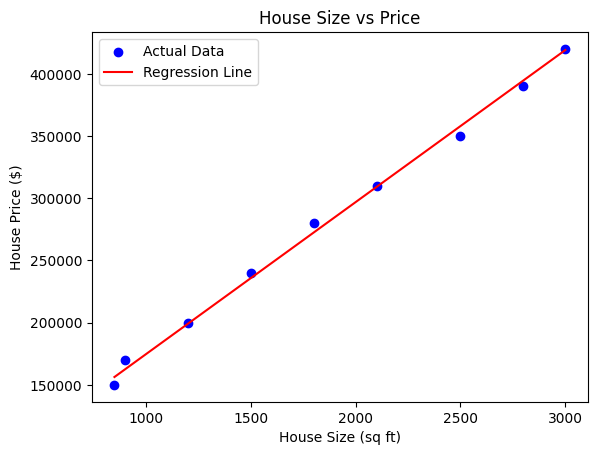

In [22]:
plt.scatter(X, y, color='blue', label='Actual Data')  # Plot actual data points
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot the regression line
plt.title("House Size vs Price")
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price ($)")
plt.legend()
plt.show()

**Predict for a New House Size**

We can make predictions for a specific house size (e.g., 2000 sq ft).

In [23]:
new_house_size = pd.DataFrame([[5000]], columns=['HouseSize'])  # Example: House size in square feet
predicted_price = model.predict(new_house_size)
print(f"Predicted price for a house of size {new_house_size.iloc[0, 0]} sq ft: ${predicted_price[0]:,.2f}")

Predicted price for a house of size 5000 sq ft: $663,519.27


**Random Forest**

Random Forest Regressor to predict house prices based on house size. Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

Use RandomForestRegressor for training:

In [24]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predict house prices using the trained model

In [25]:
y_rf_pred = rf_model.predict(X_test)

Evaluate performance using metrics such as Mean Squared Error (MSE) and R² Score

In [26]:
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 39194474.0343
R² Score: 0.9968


In [27]:
rf_results = pd.DataFrame(['Random Forest', rf_mse, rf_r2]).transpose()
rf_results.columns = ['Method', 'Testing MSE', 'Testing R2']
rf_results

,Method,Testing MSE,Testing R2
0,Random Forest,845000.0,0.99993


model comparison

In [28]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Testing MSE,Testing R2
0,Linear Regression,39194474.034292,0.996761
1,Random Forest,845000.0,0.99993


In [29]:
new_house_size = [[5000]]  # Example: House size in square feet
predicted_price = rf_model.predict(new_house_size)
print(f"Predicted price for a house of size {new_house_size[0][0]} sq ft: ${predicted_price[0]:,.2f}")


Predicted price for a house of size 5000 sq ft: $388,800.00


/home/mulombi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
